# Titanic Data Analysis

##### Whitney King

This notebook exists to investigate a sample of passenger data from the sinking of the Titanic. It contains questions posed about the data, and will use data analysis features built into NumPy and Pandas to perform analysis, and draw conclusions to those questions. The dataset will be drawn from the file: titanic-data.csv

## Questions About Data

When it comes to an event of such historical significance as the sinking of the Titanic, it's easy to come up with questions about what might have happened to influence the number of people that survived, and what factors might have contributed to who survived.

The main questions that this analysis will focus on answering are the below. It's important to note that any findings in this analysis are based on a sample, are not definiative, and in most cases there won't be a single correct answer to the questions posed. In the movie *Titanic*, when the passengers are being shuffled onto the lifeboats, you hear the famous repeated line "Women and children first!", while upperclass passengers, women, and children are being shuffled onto the too few life boats.

1. **What porportion of passengers in the sample survived?**

2. **Did  woman and children actually have a higher survival rate?**

3. **Did upperclass passengers have an advantage that translated into a higher survival rate than lower class passengers?**

## Code and Report

### Import Modules

In [1]:
# Import data analysis and visualization modules
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data from CSV into Pandas DataFrame
titanic_df = pd.read_csv('titanic-data.csv')

### Preview Data in DataFrame

A preview of the data is done in order to gain an understanding of what is being worked with. Looking at both the head and the tail of the data frame will allow investigation into what data cleanup will need to be done, such as accounting for null values.

In [3]:
# Preview DataFrame Head
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Preview DataFrame Tail
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Get DataFrame Data Types
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Looking at ``titanic_df.info()`` gives a lot of useful insights. Here we can see there are three different data types represented in the dataframe, 12 columns, and 891 total rows of passenger data. The total number passengers that were on the Titanic when it sank was 2,224, so the sample we're analyzing is represenative of roughly 40% of the actual population on board.

### Descriptive Statistics

#### Numerical Data

It will be extremely beneficial to gain an understanding of the statistical breakdown of each numerical column. This will set us on the road to answering the initial questions posed, as well as discovering the answers to others along the way. Luckily, Pandas has the ``.describe()`` function for doing simple descriptive statistics.

In [6]:
#Descriptive statistics on numerical data
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Immediately we can see some interesting numbers here, which we'll break down the most important ones:

* **PassengerId**:  Unique for each passenger
 * *Count* shows a confirmation of 891 unique names, which correlates to the expectation of 891 individual passengers.
* **Survived**:  Survival is a binary option, 0 for no and 1 for yes
 * *Mean* gives us the proportion of passengers in the sample that survived (and the answer to question 1), .383838, or roughly **38% of the sample survived**
* **Pclass**:  Integer equal to 1, 2, or 3 indicating the class of each passenger (lower, middle, or upper)
 * *Mean* here shows that the average passenger class (2.3) was skewed slightly towards upperclass.
* **Age**:  Number representing the age of each passenger, though as we can see in ``titanic_df.tail()``, some passengers have *NaN* for their age
 * *Count* shows that 714 passengers in the sample have a recorded age.
 * Of those, *Min* shows the youngest passenger was about 5 months old, and *Max* shows the oldest was 80 years old, and *Mean* shows the average age of passengers on board was just under 30 years old.
* **SibSp**:  Number of siblings also on board
 * *Min* and *Max* show that the number of siblings each passenger had on board ranged from 0 - 8.
 * *Mean* shows the average number of siblings was .52, which tells us that most passengers were not traveling with siblings.
* **Parch**:  Number of children also on board
 * *Min* and *Max* show that the number of children each passenger had on board ranged from 0 - 6.
 * *Mean* shows the average number of children was .38, which tells us that most passengers were not traveling with kids.
* **Fare**:  amount paid for the ticket by each passenger
 * *Min* shows us the lowest fare paid was 0
 * *Max* shows the highest fare paid was 512.40.
 * *Mean* show the average fare paid by passengers was about 32.20.

For a quick comparison, we'll create a function that calls the NumPy functions to verify the mean, standard deviation, min, and max of numerical columns.

In [7]:
columns = list(titanic_df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

def describe_data(data, col):
    print ('\n\n', col)
    print ('_' * 40)
    print ('Mean:', np.mean(data)) #NumPy Mean
    print ('STD:', np.std(data))   #NumPy STD
    print ('Min:', np.min(data))   #NumPy Min
    print ('Max:', np.max(data))   #NumPy Max

for c in columns:
    describe_data(titanic_df[c], c)



 PassengerId
________________________________________
Mean: 446.0
STD: 257.20938292890224
Min: 1
Max: 891


 Survived
________________________________________
Mean: 0.3838383838383838
STD: 0.48631931786710086
Min: 0
Max: 1


 Pclass
________________________________________
Mean: 2.308641975308642
STD: 0.8356019334795189
Min: 1
Max: 3


 Age
________________________________________
Mean: 29.69911764705882
STD: 14.516321150817317
Min: 0.42
Max: 80.0


 SibSp
________________________________________
Mean: 0.5230078563411896
STD: 1.1021244350892836
Min: 0
Max: 8


 Parch
________________________________________
Mean: 0.38159371492704824
STD: 0.8056047612452284
Min: 0
Max: 6


 Fare
________________________________________
Mean: 32.2042079685746
STD: 49.66553444477411
Min: 0.0
Max: 512.3292


#### Categorical Data

Using ``.describe(include=['O'])`` will populate a table with the categorial data instead of the numerical data. Not all of this is useful, but there are a few things to look at here that will help with the rest of the analysis.

In [8]:
#Descriptive statistics on categorical data
titanic_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Banfield, Mr. Frederick James",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


* **Sex**:  Male or Female
 * Passengers are each assigned male or female, with male being the more frequent value at 577 occurances.
 * 577 / 891 = .6476 or 64.76% of passengers on board were male, so 35.24% were female.
* **Cabin**:  Cabin passenger stayed in, may be *NaN*
 * Room number listed for each passenger, some passengers shared quarters, though many passengers did not have a listed cabin.    
 * There are 204 unique cabins listed

### Data Analysis

The descriptive statistics give a good generalized overview of the picture on board the Titanic, however it doesn't answer all of the posed questions, and makes details hard to visualize. Furthermore, data isn't bucketized or classified to help make interpreting the data, and answer these questions more straightforward. Using what we've wrangled so far, and pivoting on that, we'll dig deeper into this data to answer each question.

#### Sex and Survival

To answer question 2, we will need to break the analysis into several parts. First, we will look at the impact sex had on survival by pivoting the dataframe.

In [9]:
# Select Sex and Survived Columns
# Group data by sex
# Show index for row
# Return mean of values for male/female
# Sort by highest survival rate first
titanic_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


This table shows us the percentage of females that survived, and the percentage of males that survived. The female survival rate was 74.2%, and the male survival rate was 18.9%. The huge gap between these numbers is an immediate indication that the female survival rate on the Titanic was significantly higher than the male survival rate, and **being a woman did in fact increase your chances of survival**.

#### Age and Survival

Since age spans a wide range, grouping passengers out by indiviudal age values would make visualizing the survival rate by age in a table very difficult. Instead, to answer the second part of question two, it's more appropriate to use a histogram with bins that group passengers in buckets of age. By doing this, it will be much easier to visualize patterns in the relationship between age and survival.

First, it would be helpful to have a visual indication of the age distribution in our sample.

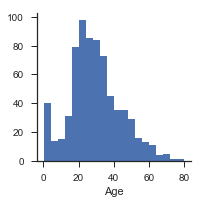

In [10]:
# Set plot style
sns.set(style='ticks', color_codes=True)

# Plot passenger age distribution
age_hist = sns.FacetGrid(titanic_df)
age_hist.map(plt.hist, 'Age', bins=20)

To begin to answer our question about the the survival rates of children, was can see that there were about 40 kids aged 5 years or younger in the sample. The majority of passengers were between the ages of 20 - 35, which matches our earlier observations.

Next, we'll break the histogram out by Survival.

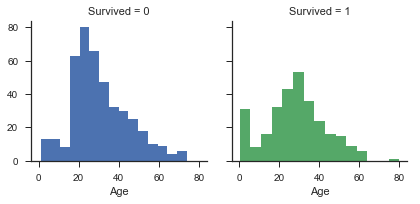

In [11]:
# Plot histogram of survival by age
age_hist = sns.FacetGrid(titanic_df, col='Survived', hue='Survived')
age_hist.map(plt.hist, 'Age', bins=15)

The above shows the overall death and survival rates broken down by age. We can see that **children under the age of 5 had a high survival rate**. Additionally, we can see the vast majority of passengers that died were between 20-35 years old. Consdiering this is the expectation for the majority age range on board, this isn't much of a surprise. 

To get a better grasp on the exact figures, we can create a new column that groups age into ranges, and then use that to calculate survival percentages.

In [12]:
# Create AgeRange with 16 ranges
titanic_df['AgeRange'] = pd.cut(titanic_df['Age'], 16)

# Calculate proportion of surviors for each AgeRange
titanic_df[['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean().sort_values(by='AgeRange', ascending=True)

,AgeRange,Survived
0,"(0.34, 5.394]",0.704545
1,"(5.394, 10.367]",0.350000
2,"(10.367, 15.341]",0.578947
3,"(15.341, 20.315]",0.343750
4,"(20.315, 25.289]",0.344262
5,"(25.289, 30.263]",0.388889
6,"(30.263, 35.236]",0.465909
7,"(35.236, 40.21]",0.417910
8,"(40.21, 45.184]",0.361702
9,"(45.184, 50.157]",0.410256


This groups ages in roughly 5 year increments, and has a survival rate for each. We can see that children under the age of 5 had a 70% rate of survival, and elderly 75 and older all survived. Every age range in between had a much lower percentage of survival.

What does this look like when we break it out by both survival and sex?

#### Age, Sex, and Survival

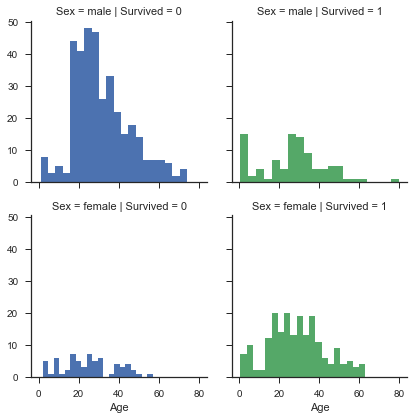

In [13]:
# Plot histogram by survival, sex, and age
age_sex_hist = sns.FacetGrid(titanic_df, col='Survived', row='Sex', hue='Survived')
age_sex_hist.map(plt.hist, 'Age', bins=20)

This breakdown gives us an extremely interesting and informative view into the answer about survivability for women and children. If we look at the data for children 5 and under, we can see that sex didn't have much of an impact on survival. By in large, **most of the children in this sample survived, including the males**.

Another interesting insight we can see is just how many of the males on board died (aside from male children under 5). Men were more likely to have died than to have survived. When we make the same comparison for females, you can see that females in almost every age range were more likely to survive than to have died.

To validate the inferences made here, we can look at the numbers in a table once again, though it becomes harder to read with more variables. However, viewing this type of table can really emphasize how helpful histograms can be for visualizing data.

In [14]:
# Calculate proportion of surviors for each AgeRange
titanic_df[['Sex', 'AgeRange', 'Survived']].groupby(['Sex', 'AgeRange'], as_index=False).mean().sort_values(by='AgeRange', ascending=True)

,Sex,AgeRange,Survived
0,female,"(0.34, 5.394]",0.761905
16,male,"(0.34, 5.394]",0.652174
17,male,"(5.394, 10.367]",0.400000
1,female,"(5.394, 10.367]",0.300000
18,male,"(10.367, 15.341]",0.285714
2,female,"(10.367, 15.341]",0.750000
3,female,"(15.341, 20.315]",0.735294
19,male,"(15.341, 20.315]",0.129032
4,female,"(20.315, 25.289]",0.755556
20,male,"(20.315, 25.289]",0.103896


Based on these observations and numbers, **we can conclude that both women and children had a higher chance of survival.**

#### Class and Survival

What kind of impact did class have on survival? Were upperclass passengers more likely to have made it onto a lifeboat than middle and lower class passengers? These questions are both extensions of our third question, and would be interesting to examine using bar and point plots. This will show us the mean and confidence interval of survival by class. We'll start with a simple look at a plot of passenger survival by class on a point plot.

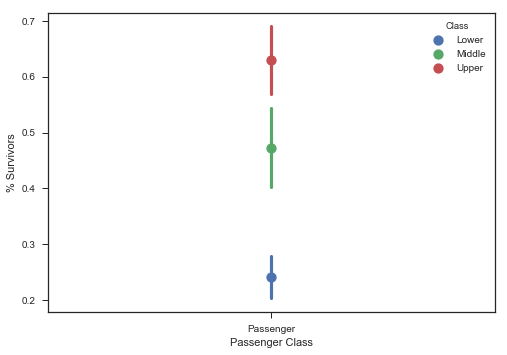

In [19]:
#Create Passenger column to plot total passengers
titanic_df['Passenger'] = 'Passenger'
# Create Class column with string values for class
titanic_df['Class'] = titanic_df['Pclass'].map( {1: 'Upper', 2: 'Middle', 3: 'Lower'} )

# Create PointPlot for Passengers by Class
bp = sns.pointplot(x='Passenger', y='Survived', hue='Class', data=titanic_df, hue_order=['Lower', 'Middle', 'Upper'])
bp.set(ylabel='% Survivors', xlabel='Passenger Class')

This plot shows the average survival and confidence interval of passengers by class. Looking at the breakdown of average survival rates by class shows a **stark correlation between class and rate of survival**. Lower class passenger survival ranged somewhere between 20 - 30%, while upper class survival ranged somewhere between 55 - 70%, with middle class ranging somewhere between 35 - 55%.

#### Class, Sex, and Survival

Next, let's drill down into this further and break the bar plot out by sex to see how class impacted survival of men and women.

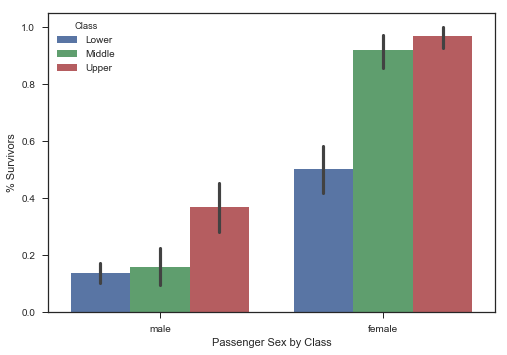

In [16]:
# Create PointPlot for Passengers by Class and Sex
bps = sns.barplot(x='Sex', y='Survived', hue='Class', data=titanic_df, hue_order=['Lower', 'Middle', 'Upper'])
bps.set(ylabel='% Survivors', xlabel='Passenger Sex by Class')

We can see that middle class female passengers had almost the same rate of survival as upperclass females, but middle class men had about the same rate of survival as lower class men, which further illustrates the greater liklihood of women to have survived. **Overall we can observe that upperclass passengers did indeed have a higher chance of survival than lower class passengers regardless of sex.**

We can do a similar breakdown using the AgeRange column created earlier, though we'll recreate it with less ranges for readability, and instead use a point plot since we're dealing with numerical data, which will again show us the mean and confidence interval.

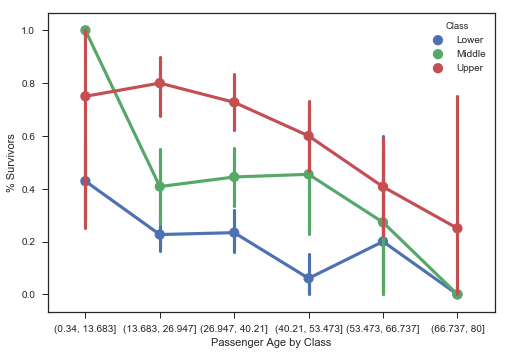

In [17]:
# Recreate AgeRanges
titanic_df['AgeRange'] = pd.cut(titanic_df['Age'], 6)

# Create PointPlot for Passengers by Class and Age
pp = sns.pointplot(x='AgeRange', y='Survived', hue='Class', data=titanic_df, hue_order=['Lower', 'Middle', 'Upper'])
pp.set(ylabel='% Survivors', xlabel='Passenger Age by Class')

Here we can see again that **children (13 and under for these age ranges) of all classes had a higher rate of survival than other age ranges within their own class**. We can see that a large number of the children that did die were lower class passengers. Overall, upperclass passengers of all ages were more likely to survive (aside from middle class children, all whom survived).

For quick validation into the correlation between class and survival, we can use NumPy to calculate the correlation coefficients between Pclass and Survived.

In [18]:
#Pearsons R for class and survival
np.corrcoef(x=titanic_df['Pclass'], y=titanic_df['Survived'])

array([[ 1.        , -0.33848104],
       [-0.33848104,  1.        ]])

What a negative correlation tells us is that when class increases (1 --> 2 --> 3), survival decreases. So, **since lower class is represented as 3, lower class is correlated with lower survival**. 

## Limitations

* **As some of these inferences were drawn based on correlation, it's always important to remember that correlation does not imply causation.** 
 * This creates limitations to the amount we can infer from the dataset alone, as it's important not to jump to conclusions.
 * For all observations, we're looking at correlation between variables, so we can't imply causation.
 * However we can use this information to further investigate hypotheses around survival on the Titanic.
* **Since we know that some passengers did not have a recorded age, entries with *'NaN'* were not be taken into account when running these numbers.** 
 * Values were not cleaned and were instead ignored, since we don't know the age of those passengers.
 * This data was left along since we don't want to make assumptions that would skew our analysis on the data we do have available.
 * This limitation inhibits the amount of conclusions we can draw based on an imcomplete set. 
* **Conclusions were drawn based on descriptive statistics and charts, and opted not to run t-tests on the sample.**
 * Making inferences on data without this t-test limits the confidence in which we can declare these conclusions, so this analysis has been done based on observations.

## Summary

Here is a quick summary of the answers to the questions posed as gleaned in this analysis:

* **What porportion of passengers in the sample survived?**
 * 38% of total passengers in the sample survived
* **Did  woman and children have a higher survival rate?**
 * The female survival rate in this sample was 55.3% higher than the survival rate for males. 
  * Women had a much higher rate of survival than men.
 * Children under the age of 5, regardless of sex, had a much higher rate of survival
* **Did upperclass passengers in the sample have an advantage that translated into a higher survival rate than lower class passengers?**
 * Class has a strong correlation with survival, with upperclass passengers having a much larger rate of survival than lower class passengers, regardless of sex and age.
 * Upperclass passengers were more likely to survive than lower class passengers.

## Resources

* Titanic Data Science Solutions:  https://www.kaggle.com/startupsci/titanic/titanic-data-science-solutions/run/870100
* Seaborn - Plotting with Categorical Data:  http://seaborn.pydata.org/tutorial/categorical.html
* Pandas Visualization:  http://pandas.pydata.org/pandas-docs/stable/visualization.html